<a href="https://colab.research.google.com/github/denner-bocardi/decision_tree_classifier/blob/main/decision_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classifier

The objective of this project is to learn how to build a Decision Tree Classifier, and also how we can show the decision tree levels in a beautiful way.

# The dataset

This dataset is from Kaggle. We can access here on this [link](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m)

# Installing Graphviz

For showing the Decision Tree we will need a visualizaztion softwere called Graphviz. You will need to install it on your path.
Since this is a Google Colab notebook and we can install it with a 'apt-get' command.

In [ ]:
!apt-get graphviz
!pip install graphviz

E: Invalid operation graphviz
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Importing the dataset

In [ ]:
dataset = pd.read_csv('/home/dataset/BankChurners.csv')
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


On the dataset page on Kaggle we have a description of all the columns on the data set. As you can see here:

1. **CLIENTNUM:** Unique identifier for each customer. (Integer)
2. **Attrition_Flag:**	Flag indicating whether or not the customer has churned out. (Boolean)
3. **Customer_Age:**	Age of customer. (Integer)
4. **Gender:**	Gender of customer. (String)
5. **Dependent_count:**	Number of dependents that customer has. (Integer)
6. **Education_Level:**	Education level of customer. (String)
7. **Marital_Status:**	Marital status of customer. (String)
8. **Income_Category:**	Income category of customer. (String)
9. **Card_Category:**	Type of card held by customer. (String)
10. **Months_on_book:**	How long customer has been on the books. (Integer)
11. **Total_Relationship_Count:**	Total number of relationships customer has with the credit card provider. (Integer)
12. **Months_Inactive_12_mon:**	Number of months customer has been inactive in the last twelve months. (Integer)
13. **Contacts_Count_12_mon:**	Number of contacts customer has had in the last twelve months. (Integer)
14. **Credit_Limit:**	Credit limit of customer. (Integer)
15. **Total_Revolving_Bal:**	Total revolving balance of customer. (Integer)
16. **Avg_Open_To_Buy:**	Average open to buy ratio of customer. (Integer)
17. **Total_Amt_Chng_Q4_Q1:**	Total amount changed from quarter 4 to quarter 1. (Integer)
18. **Total_Trans_Amt:**	Total transaction amount. (Integer)
19. **Total_Trans_Ct:**	Total transaction count. (Integer)
20. **Total_Ct_Chng_Q4_Q1:**	Total count changed from quarter 4 to quarter 1. (Integer)
21. **Avg_Utilization_Ratio:**	Average utilization ratio of customer. (Integer)
22.**Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1:**	Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such

Initially, I want to padronize the name of the columns and drop the columns we are not using on this analysis. 

In [ ]:
maping = {
    'CLIENTNUM': 'Customer_Id',
    'Gender': 'Customer_Gender',
    'Dependent_count': 'Dependent_Count',
    'Month_on_book': 'Monht_on_Book',
}

columns_to_drop = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                   'Total_Amt_Chng_Q4_Q1', 
                   'Total_Ct_Chng_Q4_Q1'
                   ]


dataset.rename(columns = maping, inplace = True)
dataset.drop(columns = columns_to_drop, inplace = True)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


# Exploring, cleaning and preparing the dataset

OBS: I already used this dataset in another project (a KNN Classifier, as you can see [here](https://github.com/denner-bocardi/knn-classifier-project)), so the "Exploring The Dataset" section here is the same I did there, if you alredy read the another project you can scape to the "Decision Tree Estimator" section.

## Attrition_Flag

The *attrition_flag* is our target, we start by having a deeper look into this variable. 

In [ ]:
dataset['Attrition_Flag'].describe()

count                 10127
unique                    2
top       Existing Customer
freq                   8500
Name: Attrition_Flag, dtype: object

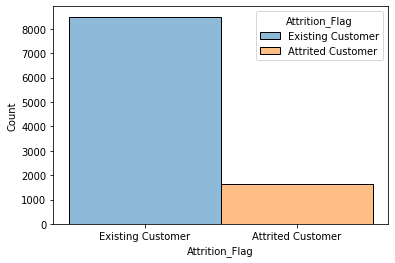

In [ ]:
sns.histplot(data = dataset, x = 'Attrition_Flag', hue = 'Attrition_Flag')

## Age

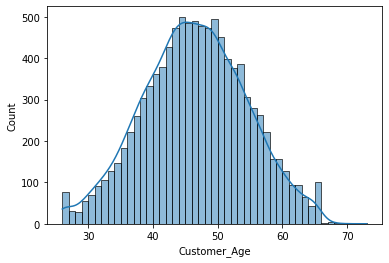

In [ ]:
sns.histplot(data = dataset, x = 'Customer_Age', kde=True)

## Gender

OBS: Here we have a problem that is: the dataset is set up only for two genders.
We don't see any other gender that is not: Male or Female. The is no category for transgender or non-binary people to fit in. So, I will use this columns as a feature in the model, but keeping in mid that it is not complete as it should be.

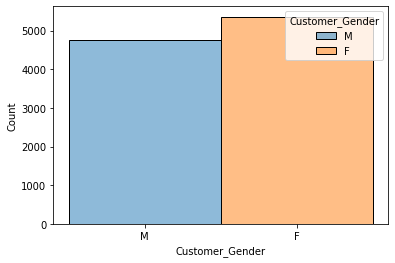

In [ ]:
sns.histplot(data = dataset, x = 'Customer_Gender', hue = 'Customer_Gender')

## Marital Status

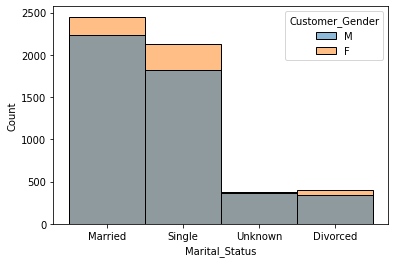

In [ ]:
sns.histplot(data = dataset, x = 'Marital_Status', hue = 'Customer_Gender')

## Education Level

In [ ]:
dataset['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

## Income Category

In [ ]:
dataset['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

## Preparing Dataset

### Categorial Features

#### Gender

The gender category is easy to treat because we have only 2 categories. So I will just use 1 for male and 0 for female

In [ ]:
gender_map = {
    'M': 1,
    'F': 0
}

dataset['Customer_Gender'] = dataset['Customer_Gender'].map(gender_map)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


#### Education Level

The education level is is a ordinal category, so I will assign to the 0 up to 6 according to the the education level. And assigning 0 to unknown

In [ ]:
education_level_map = {
        'Unknown'       : 0,
        'Uneducated'    : 1,
        'High School'   : 2,
        'College'       : 3,
        'Graduate'      : 4,
        'Post-Graduate' : 5,
        'Doctorate'     : 6
}

dataset['Education_Level'] = dataset['Education_Level'].map(education_level_map)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,2,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,0,5,4,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,1,3,4,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,0,4,2,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,1,3,1,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


#### Income Category

The Incoming Category is also an ordinal feature. So we will rate it from 0 up to 6. Just like we did on the Education Level

In [ ]:
incoming_category_map = {
    'Unknown'        : 0,
    'Less than $40K' : 1, 
    '$40K - $60K'    : 2,
    '$60K - $80K'    : 3,
    '$80K - $120K'   : 4,
    '$120K +'        : 5
}

dataset['Income_Category'] = dataset['Income_Category'].map(incoming_category_map)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,2,Married,3,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,0,5,4,Single,1,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,1,3,4,Married,4,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,0,4,2,Unknown,1,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,1,3,1,Married,3,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000


#### Card Category

Another ordinal categorical variable, we already know how to handle it.

In [ ]:
card_category_map = {
    'Blue'     : 1,
    'Silver'   : 2,
    'Gold'     : 3,
    'Platinum' : 4  
}

dataset['Card_Category'] = dataset['Card_Category'].map(card_category_map)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,2,Married,3,1,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,0,5,4,Single,1,1,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,1,3,4,Married,4,1,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,0,4,2,Unknown,1,1,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,1,3,1,Married,3,1,21,5,1,0,4716.0,0,4716.0,816,28,0.000


#### Attrition Flag

The same as the Marital Status here, is a binary feature, so I will set 1 for 'Existin Customer' and 0 to 'Attrited Customer'

In [ ]:
attrition_map = {
    'Existing Customer': 1,
    'Attrited Customer': 0
}

dataset['Attrition_Flag'] = dataset['Attrition_Flag'].map(attrition_map)
dataset.tail()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
10122,772366833,1,50,1,2,4,Single,2,1,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,0,41,1,2,0,Divorced,2,1,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,0,44,0,1,2,Married,1,1,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,0,30,1,2,4,Unknown,2,1,36,4,3,3,5281.0,0,5281.0,8395,62,0.000
10126,714337233,0,43,0,2,4,Married,1,2,25,6,2,4,10388.0,1961,8427.0,10294,61,0.189


#### Marital Status

The marital status is diferent. We don't have an order, it is a nominal categorical variable. So we will use the OneHotEncoder to fit it into a numerical feature so we can use this on our model.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()

ohe_transformed = pd.DataFrame(ohe.fit_transform(dataset[['Marital_Status']]).toarray())

dataset = dataset.join(ohe_transformed)

In [ ]:
dataset.rename(columns = {0: 'Marital_Status_0', 1: 'Marital_Status_1', 2: 'Marital_Status_2', 3: 'Marital_Status_3'}, inplace = True)
dataset.head()

,Customer_Id,Attrition_Flag,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3
0,768805383,1,45,1,3,2,Married,3,1,39,...,12691.0,777,11914.0,1144,42,0.061,0.0,1.0,0.0,0.0
1,818770008,1,49,0,5,4,Single,1,1,44,...,8256.0,864,7392.0,1291,33,0.105,0.0,0.0,1.0,0.0
2,713982108,1,51,1,3,4,Married,4,1,36,...,3418.0,0,3418.0,1887,20,0.000,0.0,1.0,0.0,0.0
3,769911858,1,40,0,4,2,Unknown,1,1,34,...,3313.0,2517,796.0,1171,20,0.760,0.0,0.0,0.0,1.0
4,709106358,1,40,1,3,1,Married,3,1,21,...,4716.0,0,4716.0,816,28,0.000,0.0,1.0,0.0,0.0


# Decision Tree Estimator

Now we will train and test our Decision Tree Estimator to categorize the clients. Here the most important thing will be to build and show the decision tree itself. But first I will run the model and then I will build the visualization of the decision tree

In [ ]:
features_list = ['Customer_Age',                
                 'Customer_Gender',             
                 'Dependent_Count',            
                 'Education_Level',            
                 'Marital_Status_0',
                 'Marital_Status_1',
                 'Marital_Status_2',
                 'Marital_Status_3',         
                 'Income_Category',
                 'Card_Category',            
                 'Months_on_book',             
                 'Total_Relationship_Count',   
                 'Months_Inactive_12_mon',     
                 'Contacts_Count_12_mon',      
                 'Credit_Limit',               
                 'Total_Revolving_Bal',        
                 'Avg_Open_To_Buy',            
                 'Total_Trans_Amt',            
                 'Total_Trans_Ct',             
                 'Avg_Utilization_Ratio']      
            
features = dataset[features_list]
features.head()

,Customer_Age,Customer_Gender,Dependent_Count,Education_Level,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,45,1,3,2,0.0,1.0,0.0,0.0,3,1,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,49,0,5,4,0.0,0.0,1.0,0.0,1,1,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,51,1,3,4,0.0,1.0,0.0,0.0,4,1,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,40,0,4,2,0.0,0.0,0.0,1.0,1,1,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,40,1,3,1,0.0,1.0,0.0,0.0,3,1,21,5,1,0,4716.0,0,4716.0,816,28,0.000


In [ ]:
target = dataset['Attrition_Flag']

Now we are doing the train/test split

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(features, target, test_size = 0.20, stratify = target)

And we are ready to train and test the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

d_tree_model = DecisionTreeClassifier(max_depth = 3) # the decision tree will have 3 steps to decide (we can change this, but for a visual reason, I will keep in 3)
d_tree_model.fit(train_x, train_y)
d_tree_prob = d_tree_model.predict(test_x)

d_tree_accuracy = accuracy_score(test_y, d_tree_prob)
print('The accuracy of the Decision Tree Estimator is of', round(d_tree_accuracy, 2))

The accuracy of the Decision Tree Estimator is of 0.92


Now we have the Decision Tree classifier. But we want to see how the classifier decides to estimate for 'Existing Client' or 'Attrited Client'.

We do that with de Graphviz from SKLearn. We install Graphviz at the beginning of this notebook and now we gonna to use it.

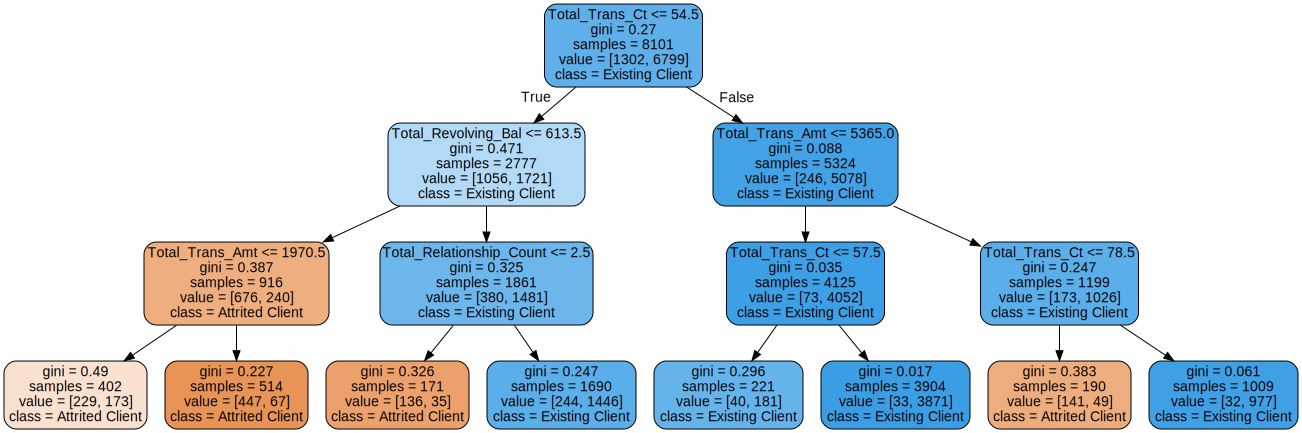

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = features.columns # a list with the name of the columns of the features 
dot_data = export_graphviz(d_tree_model, #the model
                           feature_names = features, #name of the features
                           filled = True, # to fill with color the boxes
                           rounded = True, # to make the corner of the boxes roudy :)
                           class_names = ['Attrited Client', 'Existing Client']) #the name of the classes (must be a list, the same patern of the features)

graph = graphviz.Source(dot_data) # the export_graphviz just give us a code for the graphic, we need to plot it with graphviz.Source

graph

So we have the complete decision tree of our estimator. We can explore and see how the model decides if a client will or not churn.

# Thank you!